Importing Libraries

In [1]:
from sqlalchemy import create_engine as ce
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Storing train and ideal functions dataset to MySQL Database using sqlalchemy    

In [2]:
ideal = pd.read_csv("ideal.csv")
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [3]:
file_db = ce('sqlite:///datasets.db')

In [4]:
ideal.to_sql('ideal', file_db)
train.to_sql('train', file_db)

400

In [5]:
ideal.head()

,x,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y41,y42,y43,y44,y45,y46,y47,y48,y49,y50
0,-20.000,-0.913,0.408,9.087,5.408,-9.087,0.913,-0.839,-0.851,0.816,...,-40.456,40.204,2.996,-0.008,12.996,5.298,-5.298,-0.186,0.913,0.397
1,-19.900,-0.868,0.497,9.132,5.497,-9.132,0.868,-0.865,0.169,0.994,...,-40.234,40.049,2.991,-0.008,12.991,5.293,-5.293,-0.216,0.868,0.477
2,-19.800,-0.814,0.581,9.186,5.581,-9.186,0.814,-0.889,0.612,1.163,...,-40.007,39.891,2.986,-0.008,12.986,5.288,-5.288,-0.237,0.814,0.549
3,-19.700,-0.752,0.660,9.248,5.660,-9.248,0.752,-0.911,-0.995,1.319,...,-39.776,39.730,2.981,-0.008,12.981,5.283,-5.283,-0.248,0.752,0.613
4,-19.600,-0.682,0.731,9.318,5.731,-9.318,0.682,-0.930,0.774,1.463,...,-39.541,39.566,2.976,-0.008,12.976,5.278,-5.278,-0.249,0.682,0.668


In [6]:
ideal.shape

(400, 51)

In [7]:
train.head()

,x,y1,y2,y3,y4
0,-20.000,-8020.054,40.621,-23995.455,10.076
1,-19.900,-7900.633,39.931,-23637.182,10.287
2,-19.800,-7782.173,39.955,-23282.432,10.017
3,-19.700,-7664.635,39.283,-22930.809,9.681
4,-19.600,-7549.188,40.019,-22583.383,9.523


In [8]:
train.shape

(400, 5)

In [9]:
test.head()

,x,y
0,-17.100,-5016.293
1,-11.800,-4923.834
2,-7.300,-394.904
3,-6.300,-2.587
4,14.300,2937.919


In [10]:
test.shape

(100, 2)

Graph plot

In [11]:
def plotXY(x,y,xlabel,ylabel):
    plt.figure(figsize=(7,4))
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.plot(x,y)
    plt.show()

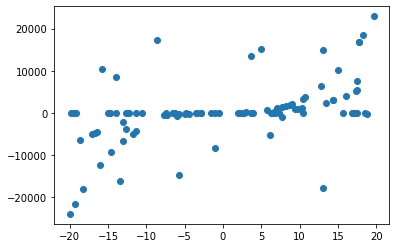

In [12]:
y = test["y"]
x = test.x
plt.scatter(x,y)

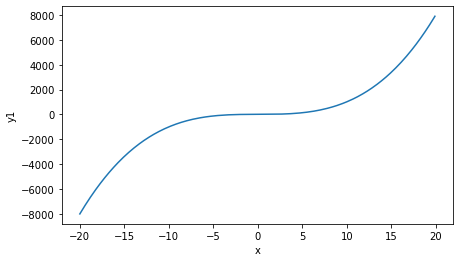

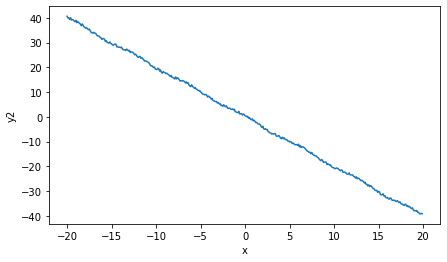

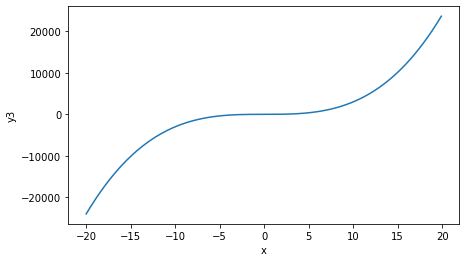

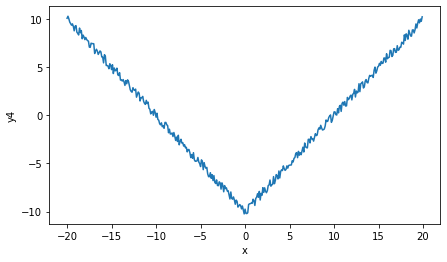

In [13]:
for i in range(1,5):
    y_col = "y" + str(i)
    y = train[y_col]
    x = train.x
    plotXY(x,y,"x",y_col)

Calculating Least Sqaure Errors

In [14]:
N = len(ideal)
N

400

In [15]:
class Myclass():
    def __init__(self,train,ideal,test):
        self.train = train
        self.ideal = ideal
        self.test = test
        self.lse_scores = [[] for i in range(4)]
        self.ideal_fxns_mappings = []
        self.maxRegression = []
        
    def get_LSE(self):
        for i in range(1,5):
            col_train = "y" + str(i)
            y_train = self.train[col_train]
            for j in range(1,51):
                col_ideal = "y" + str(j)
                y_ideal = self.ideal[col_ideal]
                self.lse_scores[i-1].append(mean_squared_error(y_train, y_ideal)*N)
                
    def get_min_LSE(self):
        data = self.lse_scores
        for i in range(4):
            lse = data[i]
            min_LSE = min(lse)
            index = lse.index(min_LSE)
            self.ideal_fxns_mappings.append([i+1,index+1,min_LSE])

In [16]:
obj = Myclass(train,ideal,test)
obj.get_LSE()
obj.get_min_LSE()
obj.ideal_fxns_mappings
# y_train, y_ideal, LSE

[[1, 28, 30.34498659994651],
 [2, 42, 31.541758962318912],
 [3, 25, 37.641211755453895],
 [4, 35, 33.47955446320874]]

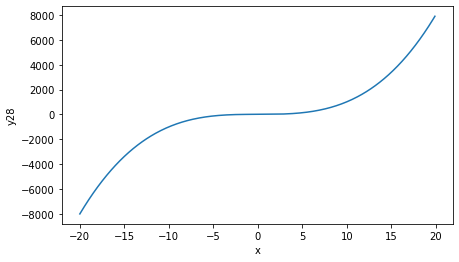

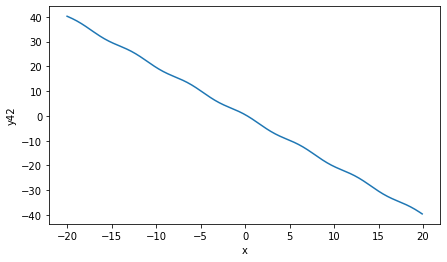

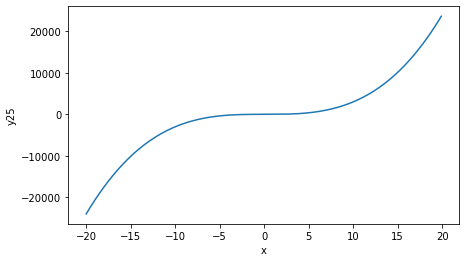

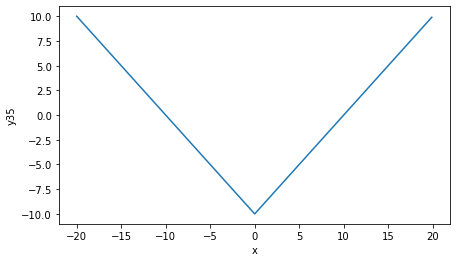

In [17]:
for i,j,k in obj.ideal_fxns_mappings:
    y_col = "y" + str(j)
    y = obj.ideal[y_col]
    x = obj.ideal.x
    plotXY(x,y,"x",y_col)

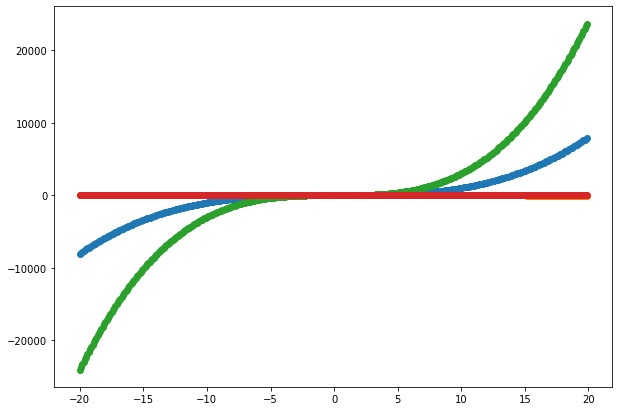

In [18]:
plt.figure(figsize=(10,7))
for i in range(1,5):
    x_train = obj.train["x"]
    y_train = obj.train["y" + str(i)]
    plt.scatter(x_train,y_train,label="y" + str(i))

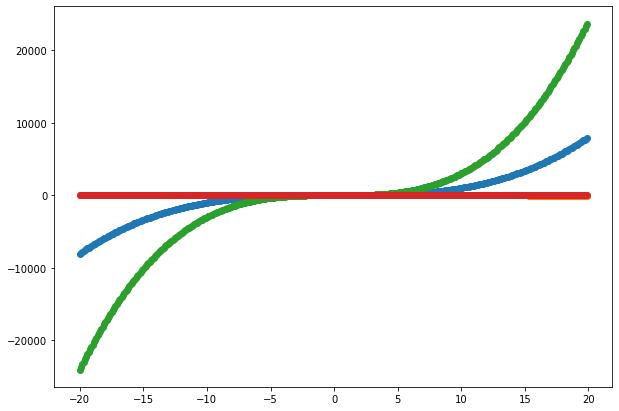

In [19]:
plt.figure(figsize=(10,7))
for i,j,k in obj.ideal_fxns_mappings:
    x_ideal = obj.ideal["x"]
    y_ideal = obj.ideal["y" + str(j)]
    plt.scatter(x_ideal,y_ideal)

In [20]:
def plot_train_ideal(x_train,x_ideal,y_train,y_ideal,ylabel,xlabel):
    plt.figure(figsize=(7,4))
    plt.scatter(x_train,y_train)
    plt.scatter(x_ideal,y_ideal)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

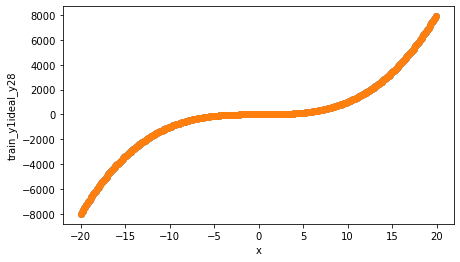

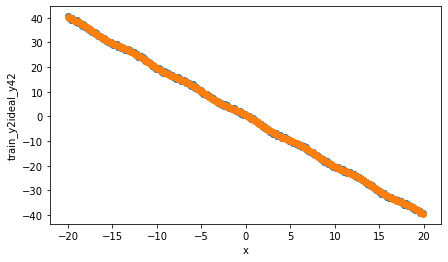

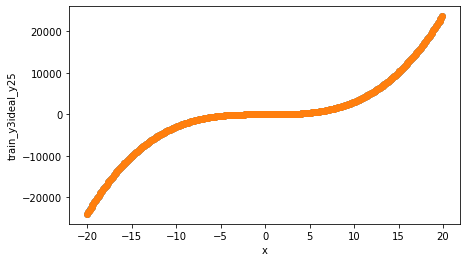

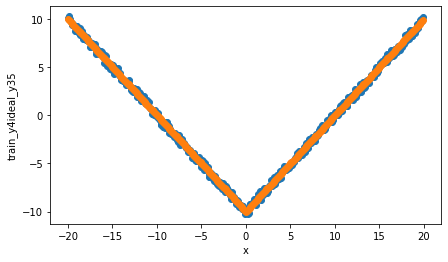

In [21]:
for i,j,k in obj.ideal_fxns_mappings:
    x_train = obj.train["x"]
    x_ideal = obj.ideal["x"]
    y_train = obj.train["y" + str(i)]
    y_ideal = obj.ideal["y" + str(j)]
    plot_train_ideal(x_train,x_ideal,y_train,y_ideal,"train_y"+str(i)+"ideal_y"+str(j) ,"x")

In [22]:
result = [[False]*4 for i in range(len(obj.test))]
i = 0
for i,j,k in obj.ideal_fxns_mappings:
    lr = LinearRegression()
    X = np.array(obj.train["x"]).reshape(-1, 1)
    Y = np.array(obj.train["y" + str(i)]).reshape(-1, 1)
    # X = np.array(obj.ideal["x"]).reshape(-1, 1)
    # Y = np.array(obj.ideal["y" + str(i)]).reshape(-1, 1)
    lr.fit(X,Y)
    largest_deviation = np.sqrt(2)*np.max(np.abs(np.array(obj.train["y" + str(i)])- np.array(obj.ideal["y" + str(j)])))
    for index,row in obj.test.iterrows():
        x = np.array(row["x"]).reshape(-1,1)
        y_pred = lr.predict(x)[0][0]
        delta_y = np.abs(row["y"]-y_pred) - largest_deviation
        result[index][i-1] = delta_y <= 0

In [23]:
result = np.array(result).T
mapping = [[] for i in range(4)]
i = 0
for values in result:
    for ind in range(len(values)):
        if values[ind]:
            mapping[i].append(ind)
    i+=1
mapping

[[], [16, 20, 27, 41, 45, 56, 77, 88, 92], [], [13, 14, 15]]

In [24]:
def plot_indices(y_col,indices):
    X = obj.ideal["x"]
    Y = obj.ideal["y" + str(y_col)]
    plt.xlabel("x")
    plt.ylabel("y" + str(y_col))
    plt.plot(X,Y)
    for ind in indices:
        x_ = obj.test["x"][ind]
        y_ = obj.test["y"][ind]
        plt.scatter(x_,y_)
    plt.show()

In [25]:
def ideal_point_mappings():
    for i,j,k in obj.ideal_fxns_mappings:
        if mapping[i-1]:
            plot_indices(j,mapping[i-1])

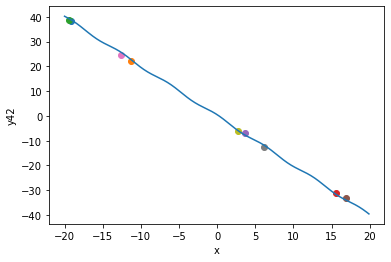

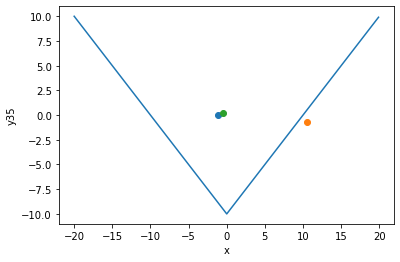

In [26]:
ideal_point_mappings()

In [27]:
df = pd.concat([obj.test,pd.DataFrame(result.T)],axis=1)
df.head(15)

,x,y,0,1,2,3
0,-17.100,-5016.293,False,False,False,False
1,-11.800,-4923.834,False,False,False,False
2,-7.300,-394.904,False,False,False,False
3,-6.300,-2.587,False,False,False,False
4,14.300,2937.919,False,False,False,False
5,17.800,16922.850,False,False,False,False
6,-11.300,-4322.557,False,False,False,False
7,10.300,1102.783,False,False,False,False
8,-5.700,-14696.724,False,False,False,False
9,-3.500,-46.847,False,False,False,False


In [28]:
df.to_sql('df', file_db)

100